# EDA

In [130]:
import pandas as pd
import csv, json
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Загрузим все файлы и объединим их в один датафрейм data.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173992 entries, 0 to 173991
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               173992 non-null  int64  
 1   is_corporative   173992 non-null  bool   
 2   posttype         173992 non-null  object 
 3   title            173991 non-null  object 
 4   hubs_pro         173992 non-null  object 
 5   hubs_nopro       173992 non-null  object 
 6   tags             173992 non-null  object 
 7   time_published   173992 non-null  object 
 8   bookmarks        173992 non-null  int64  
 9   comments_count   173992 non-null  int64  
 10  views            173992 non-null  int64  
 11  votes            173992 non-null  int64  
 12  possitive_votes  173992 non-null  int64  
 13  negative_votes   173992 non-null  int64  
 14  reading_time     173989 non-null  float64
 15  lang             173992 non-null  object 
 16  author_name      173923 non-null  obje

**Столбцы с целочисловым типом данных (int64):**
* **id** - id публикации
* **bookmarks** - количество закладок
* **comments_count** - количество комментариев
* **views**  - количество просмотров
* **votes** - финальный рейтинг публикации
* **possitive_votes**  - количество положительных голосов за публикацию
* **negative_votes**  - количество отрицательных голосов за публикацию
* **reading_time**  - время чтения публикации

**Столбцы с логическим типом данных (bool):**
* **is_corporative** - корпоративный ли пост

**Столбцы со строковым типом данных (object):**
* **posttype** - тип публикации
* **title** - заголовок публикации
* **hubs_pro** - профильные хабы (в строке список из словарей)
* **hubs_nopro** - профильные хабы (в строке список из словарей)
* **tags** - теги (в строке теги через запятую)
* **time_published** - дата и время публикации поста
* **lang** - язык публикации
* **author_name** - никнейм автора
* **text** - текст публикации

**Столбцы с числами с плавающей точкой (float64):**

* **author_id** - айди автора
* **karma** - карма автора
* **karma_votes** - количество голосов за карму
*  **rating** - рейтинг автора

**Пропуски в значениях:**

в столбце **reading_time** (3);
в столбцах **author_id, author_name, karma, karma_votes, rating** (69);
в столбце **title** (1).

Минимальный id публикации 310000, максимальный - 773144.

Описательная статистика:

In [ ]:
data[['id','bookmarks','comments_count','views','votes','possitive_votes','negative_votes','reading_time','author_id','karma','karma_votes','rating']].describe()

,id,bookmarks,comments_count,views,votes,possitive_votes,negative_votes,reading_time,author_id,karma,karma_votes,rating
count,173992.000000,173992.000000,173992.000000,1.739920e+05,173992.000000,173992.000000,173992.000000,173989.000000,1.739230e+05,173923.000000,173923.000000,173923.000000
mean,537661.417904,40.463878,28.896277,1.571193e+04,17.641794,20.392110,2.750316,5.887729,1.327259e+06,177.833352,483.419772,53.811231
std,138318.897844,68.930844,72.532036,3.393990e+04,25.734277,26.863289,5.694472,5.662615,1.044736e+06,295.057395,782.798472,104.766962
min,310000.000000,0.000000,0.000000,1.900000e+01,-194.000000,0.000000,0.000000,1.000000,1.000000e+00,-118.000000,0.000000,-67.000000
25%,415690.500000,6.000000,2.000000,3.293000e+03,5.000000,7.000000,0.000000,2.000000,2.382770e+05,12.000000,30.000000,0.000000
50%,528545.000000,20.000000,8.000000,7.616000e+03,11.000000,13.000000,1.000000,4.000000,1.257948e+06,53.000000,150.000000,0.000000
75%,673532.500000,48.000000,25.000000,1.683800e+04,21.000000,24.000000,3.000000,8.000000,2.176401e+06,203.000000,599.000000,53.500000
max,773144.000000,3813.000000,2934.000000,5.594334e+06,1447.000000,1450.000000,343.000000,127.000000,3.866976e+06,1820.000000,4240.000000,559.500000


In [ ]:
data[['lang', 'posttype','is_corporative']].describe()
# дальше мы закодируем эти переменные

,lang,posttype,is_corporative
count,173992,173992,173992
unique,2,3,2
top,ru,article,False
freq,171796,135021,107139


# Гистограммы распределения

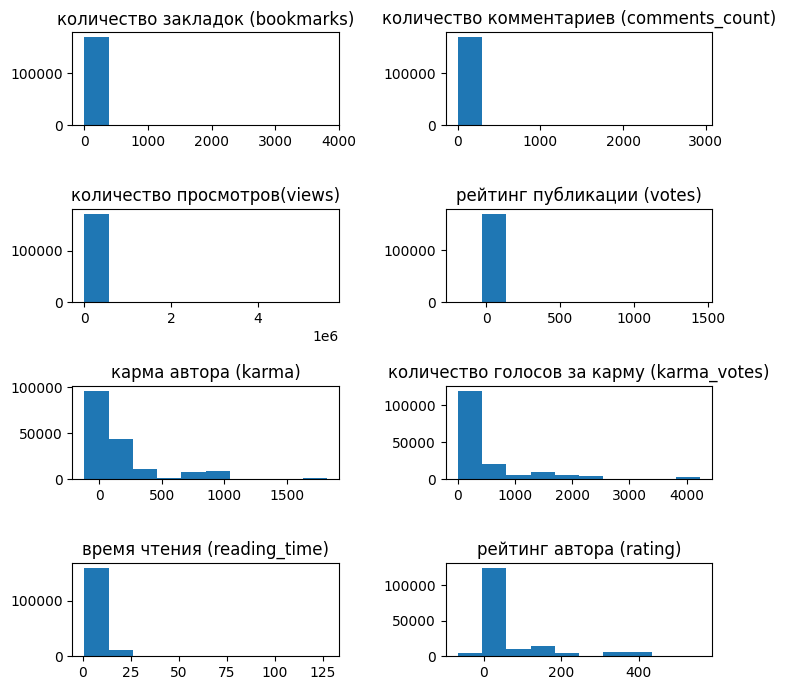

In [ ]:
fig, ((ax0, ax1), (ax2, ax3), (ax4, ax5), (ax6, ax7)) = plt.subplots(nrows=4, ncols=2,figsize=(8, 8))

ax0.hist(data['bookmarks'], histtype='bar')
ax0.set_title('количество закладок (bookmarks)')

ax1.hist(data['comments_count'], histtype='bar')
ax1.set_title('количество комментариев (comments_count)')

ax2.hist(data['views'], histtype='bar')
ax2.set_title('количество просмотров(views)')

ax3.hist(data['votes'], histtype='bar')
ax3.set_title('рейтинг публикации (votes)')

ax4.hist(data['karma'], histtype='bar')
ax4.set_title('карма автора (karma)')

ax5.hist(data['karma_votes'], histtype='bar')
ax5.set_title('количество голосов за карму (karma_votes)')

ax6.hist(data['reading_time'], histtype='bar')
ax6.set_title('время чтения (reading_time)')

ax7.hist(data['rating'], histtype='bar')
ax7.set_title('рейтинг автора (rating)')

fig.subplots_adjust(left=0.1, bottom=0.1,
                    hspace=0.9, wspace=0.4)

plt.show()

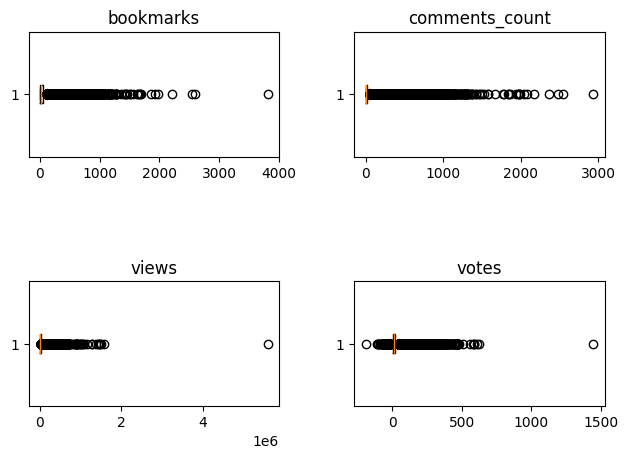

In [ ]:
fig, axs = plt.subplots(2, 2)

axs[0, 0].boxplot(data['bookmarks'], vert=False)
axs[0, 0].set_title('bookmarks')

axs[0, 1].boxplot(data['comments_count'], vert=False)
axs[0, 1].set_title('comments_count')


axs[1, 0].boxplot(data['views'], vert=False)
axs[1, 0].set_title('views')

axs[1, 1].boxplot(data['votes'], vert=False)
axs[1, 1].set_title('votes')

fig.subplots_adjust(left=0.1, right=1, bottom=0.1,
                    hspace=1, wspace=0.3)

In [ ]:
# посмотрим на статью с резко выделяющимся числом просмотров
data[data['views'] == max(data['views'])]

,id,is_corporative,posttype,title,hubs_pro,hubs_nopro,tags,time_published,bookmarks,comments_count,...,possitive_votes,negative_votes,reading_time,lang,author_name,author_id,karma,karma_votes,rating,text
71441,491974,False,article,Коронавирус: почему надо действовать прямо сейчас,"[{'id': '18081', 'alias': 'opendata', 'type': ...","[{'id': '21910', 'alias': 'popular_science', '...","коронавирус,coronavirus,covid-19,эпидемия,панд...",2020-03-12T02:02:44+00:00,537,2079,...,512,56,19.0,ru,five,110111.0,49.0,101.0,0.0,"<div xmlns=""http://www.w3.org/1999/xhtml""><h2>..."


In [ ]:
data[data['votes'] == max(data['votes'])]

,id,is_corporative,posttype,title,hubs_pro,hubs_nopro,tags,time_published,bookmarks,comments_count,...,possitive_votes,negative_votes,reading_time,lang,author_name,author_id,karma,karma_votes,rating,text
90498,536750,False,article,Самый беззащитный — уже не Сапсан. Всё оказало...,"[{'id': '50', 'alias': 'infosecurity', 'type':...",[],"РЖД,Взлом,Анализ,Пентест,игнорирование блогов,...",2021-01-13T05:51:41+00:00,799,988,...,1450,3,8.0,ru,LMonoceros,1350162.0,721.0,755.0,0.0,"<div xmlns=""http://www.w3.org/1999/xhtml""><b>{..."


## Язык публикаций

В собранных данных содержатся статьи на русском (ru) и английском языке (en). Оставлю только русскоязычные публикации, а затем удалю столбец "lang", так как в нем во всех строках осталось одно и то же обозначение русского языка (ru).

In [ ]:
data['lang'].value_counts()

ru    171796
en      2196
Name: lang, dtype: int64

In [ ]:
data.drop(data.loc[data['lang']=='en'].index, inplace=True)

In [ ]:
# удалю столбец lang, так как после удаления англоязычных статей он стал неинформативным
data.drop(columns='lang', inplace=True)

##Is corporative?

Посмотрю на количество корпоративных (True) и некорпоративных публикаций (False).

In [ ]:
data['is_corporative'].value_counts()

False    105918
True      65878
Name: is_corporative, dtype: int64

<Axes: title={'center': 'Corporative posts on Habr.ru'}>

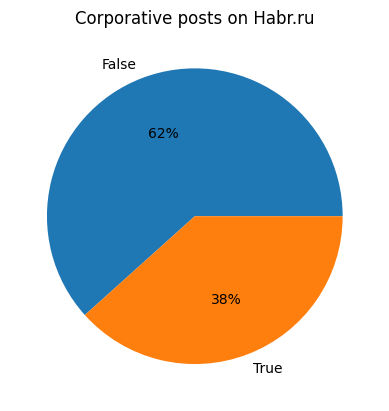

In [ ]:
data.is_corporative.value_counts().plot(kind='pie',autopct='%1.0f%%', ylabel = '',
                                        title='Corporative posts on Habr.ru')

In [ ]:
# закодируем эту переменную
data['is_corporative'] = data['is_corporative'].replace({'False': 0, 'True': 1})

## Тип публикаций

В собранных данных встречается три вида публикаций: статьи, новости и мегапроекты.

In [ ]:
data['posttype'].value_counts()

article        132846
news            38459
megaproject       491
Name: posttype, dtype: int64

<Axes: title={'center': 'Type of posts on Habr.ru'}>

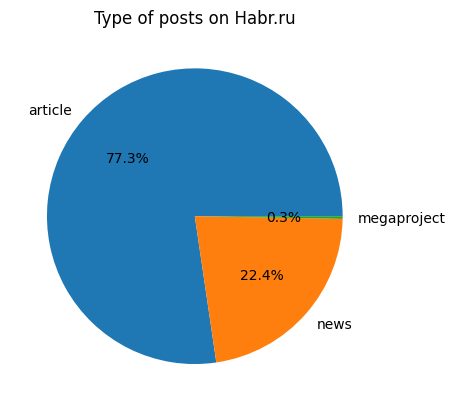

In [ ]:
data['posttype'].value_counts().plot(kind = 'pie',autopct='%1.1f%%', ylabel = '',
                                        title='Type of posts on Habr.ru')

In [ ]:
# закодируем эту переменную
data['posttype'] = data['posttype'].replace({'article': 0, 'news': 1, 'megaproject': 2})

## Информация об авторах публикаций


ТОП-10 авторов с самым большим количеством публикаций:

In [ ]:
data['author_name'].value_counts()[:10]

denis-19         7260
maybe_elf        5384
SLY_G            4509
marks            4144
alizar           3654
AnnieBronson     3230
Travis_Macrif    2583
ancotir          2379
daniilshat       2085
IgnatChuker      1828
Name: author_name, dtype: int64

Все 69 публикаций с пропусками в **author_id, author_name, karma, karma_votes, rating** имеют значение posttype "мегапроект" (закодирован как 2).

In [ ]:
# количество мегапроектов без указания автора
data['posttype'][data['author_name'].isna() == True].value_counts()

2    69
Name: posttype, dtype: int64

 При этом есть "мегапроекты" с указанием информации об авторе. Последний "мегапроект" с указанием автора был опубликован 30 июня 2022 года.

In [ ]:
# количество мегапроектов с указанием автора
data[['author_name', 'author_id']][(data['posttype'] == 2) & (data['author_name'].isna() == False)].value_counts()

author_name   author_id
megapost      1011218.0    417
mtigulev      1003940.0      3
Boomburum     9073.0         1
vlasta_vetra  963480.0       1
dtype: int64

In [ ]:
#дата публикации последнего мегапроекта с указанием автора
pd.to_datetime(data['time_published'][(data['posttype'] == 2) & (data['author_name'].isna() == False)], format = "%Y-%m-%d %H:%M:%S.%f%z").sort_values().tail(1)

130870   2022-06-30 12:00:49+00:00
Name: time_published, dtype: datetime64[ns, UTC]

In [ ]:
#дата публикации первого мегапроекта без указанием автора
pd.to_datetime(data['time_published'][(data['posttype'] == 2) & (data['author_name'].isna() == True)], format = "%Y-%m-%d %H:%M:%S.%f%z").sort_values().head(1)

128069   2022-06-01 15:49:51+00:00
Name: time_published, dtype: datetime64[ns, UTC]

Для дальнейшей работы оставляем только два типа публикаций: статьи и новости.
Мегапроекты удаляем, так как обычный пользователь публикацию такого типа разместить не может.

В столбце **author_id** изменю тип данных на целочисленный.

In [ ]:
data.drop(data.loc[data['posttype']==2].index, inplace=True)

In [ ]:
#author_id изменю на int64
data['author_id'] = data['author_id'].astype('int64')

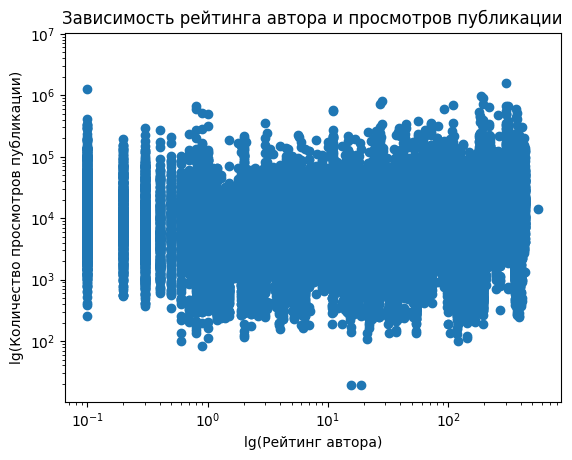

In [ ]:
plt.plot(data['rating'], data['views'], 'o')
plt.yscale('log')
plt.xscale('log')
plt.ylabel('lg(Количество просмотров публикации)')
plt.xlabel('lg(Рейтинг автора)')
plt.title('Зависимость рейтинга автора и просмотров публикации')
plt.show()

Зависимости между рейтингом автора и количеством просмотров публикации не обнаружена.

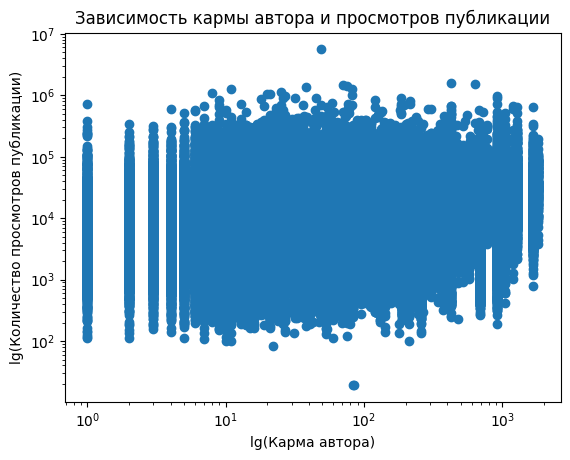

In [ ]:
plt.plot(data['karma'], data['views'], 'o')
plt.yscale('log')
plt.xscale('log')
plt.ylabel('lg(Количество просмотров публикации)')
plt.xlabel('lg(Карма автора)')
plt.title('Зависимость кармы автора и просмотров публикации')
plt.show()

Зависимости между кармой автора и количеством просмотров публикации не обнаружена.

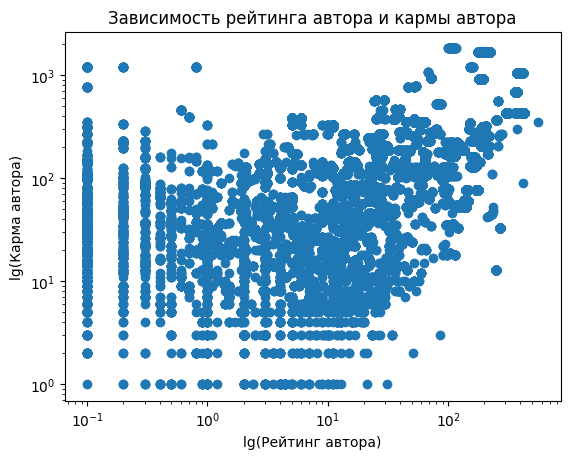

In [ ]:
plt.plot(data['rating'], data['karma'], 'o')
plt.ylabel('lg(Карма автора)')
plt.xlabel('lg(Рейтинг автора)')
plt.yscale('log')
plt.xscale('log')
plt.title('Зависимость рейтинга автора и кармы автора')
plt.show()

Наблюдается некоторая слабая зависимость между рейтингом автора и кармой автора.

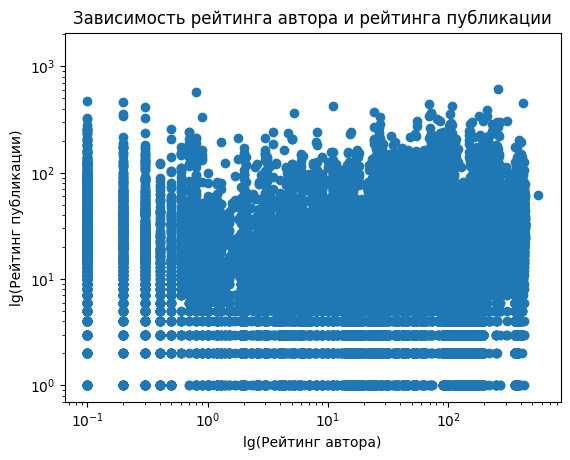

In [ ]:
plt.plot(data['rating'], data['votes'], 'o')
plt.ylabel('lg(Рейтинг публикации)')
plt.xlabel('lg(Рейтинг автора)')
plt.yscale('log')
plt.xscale('log')
plt.title('Зависимость рейтинга автора и рейтинга публикации')
plt.show()

Зависимости между рейтингом автора и рейтингом публикации не обнаружена.

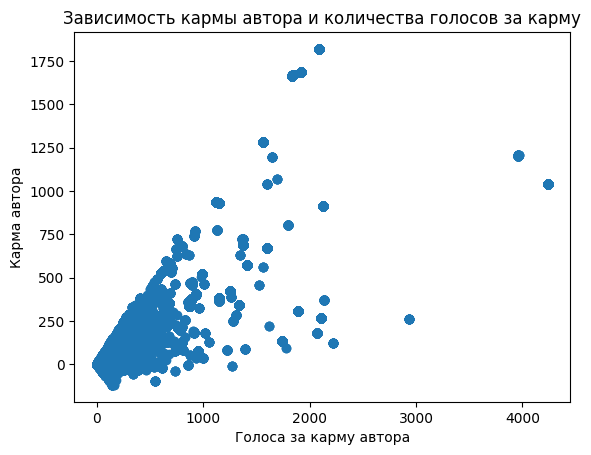

In [ ]:
plt.plot(data['karma_votes'], data['karma'], 'o')
plt.ylabel('Карма автора')
plt.xlabel('Голоса за карму автора')
plt.title('Зависимость кармы автора и количества голосов за карму')
plt.show()

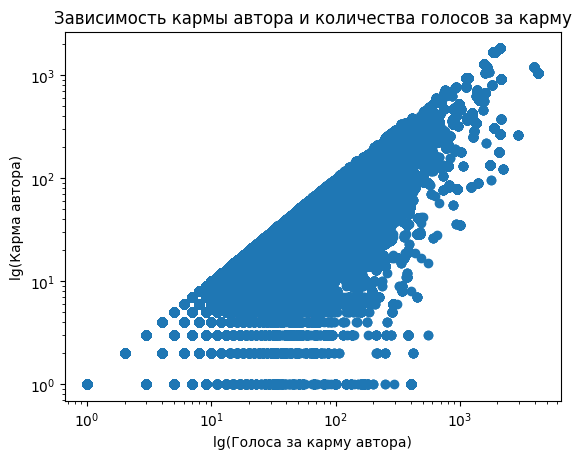

In [ ]:
plt.plot(data['karma_votes'], data['karma'], 'o')
plt.ylabel('lg(Карма автора)')
plt.xlabel('lg(Голоса за карму автора)')
plt.yscale('log')
plt.xscale('log')
plt.title('Зависимость кармы автора и количества голосов за карму')
plt.show()

Наблюдается зависимость кармы автора и количества голосов за нее: карма возрастает с увеличением количества голосов за карму автора.

## Время чтения
В этом столбце имеется три пропущенных значения, заменим эти пропуски на среднее время чтения публикаций.

In [ ]:
data['reading_time'].isna().sum()

3

In [ ]:
from numpy.core.fromnumeric import mean

data['reading_time'] = data['reading_time'].fillna(mean)

## Заголовки статей

В заголовке есть одно пропущенное значение. Внимательнее посмотрев на эту публикацию, становится понятно, что эта статья содержит заголовок с текстом "NULL", который был записан как NaN. Заменим этот пропуск обратно на ""NULL"" (в кавычках).

In [ ]:
data['title'].isna().sum()

1

In [ ]:
data[data['title'].isna()==True]

,id,is_corporative,posttype,title,hubs_pro,hubs_nopro,tags,time_published,bookmarks,comments_count,...,votes,possitive_votes,negative_votes,reading_time,author_name,author_id,karma,karma_votes,rating,text
91503,539094,True,0,NaN,"[{'id': '210', 'alias': 'it_testing', 'type': ...","[{'id': '19791', 'alias': 'ruvds', 'type': 'co...","Тестирование,разработка",2021-02-10T09:01:26+00:00,26,16,...,38,40,2,6.0,ru_vds,1220775,425.0,1255.0,430.2,"<div xmlns=""http://www.w3.org/1999/xhtml"">Мне ..."


In [ ]:
data['title'] = data['title'].fillna('"NULL"')

Посмотрим на количество символов в заголовках публикаций.

In [ ]:
len_articles = data['title'][data['posttype']==0].str.len().value_counts()
len_news = data['title'][data['posttype']==1].str.len().value_counts()

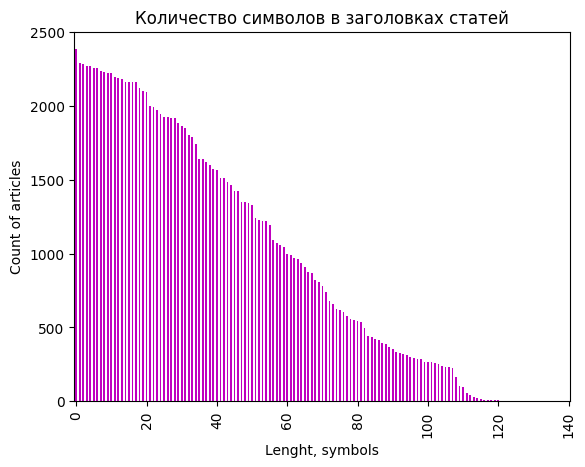

In [ ]:
len_articles.plot(kind='bar', title='Количество символов в заголовках статей',
               xlabel='Lenght, symbols', ylabel='Count of articles',
               xticks = range(0,150,20), color='m')
plt.show()

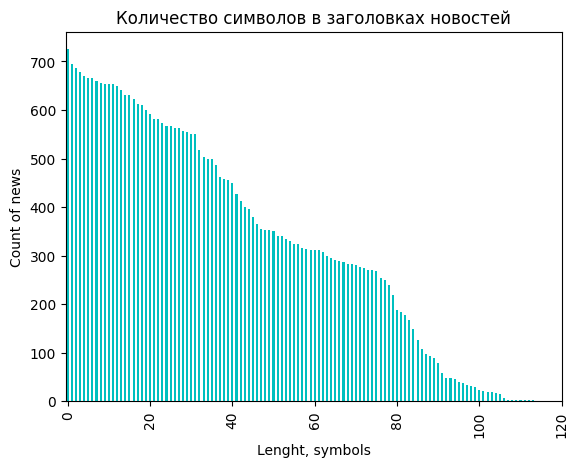

In [ ]:
len_news.plot(kind='bar', title='Количество символов в заголовках новостей',
               xlabel='Lenght, symbols', ylabel='Count of news',
               xticks = range(0,130,20),color='c')
plt.show()

## Дата публикации

Добавлю в датафрейм колонки с днем недели, в который была размещена публикация, а также датой, месяцем и годом.

Исходную колонку time_published - удалю.

В столбце **time_published** поменяю тип данных на формат DateTime.

In [ ]:
data['time_published'] = pd.to_datetime(data['time_published'], format = "%Y-%m-%d %H:%M:%S.%f%z")

Самый ранняя публикация (среди собранных данных) опубликована 15 марта 2010 года, самая свежая публикация от 10 ноября 2023 года.

In [ ]:
data['time_published'].sort_values()

25538    2010-03-15 19:02:32+00:00
12373    2011-11-10 13:54:28+00:00
12374    2011-11-14 14:28:43+00:00
12375    2011-11-16 11:47:07+00:00
18496    2013-06-05 18:32:54+00:00
                    ...           
173987   2023-11-10 11:46:43+00:00
173988   2023-11-10 11:49:58+00:00
173989   2023-11-10 11:52:49+00:00
173990   2023-11-10 12:04:46+00:00
173991   2023-11-10 12:06:30+00:00
Name: time_published, Length: 171305, dtype: datetime64[ns, UTC]

In [ ]:
# добавлю день недели как новую колонку, выведу их количество
data['weekday'] = pd.to_datetime(data['time_published']).dt.weekday
data['weekday'].value_counts().sort_index()

0    29101
1    31529
2    29537
3    31027
4    27121
5    10684
6    12306
Name: weekday, dtype: int64

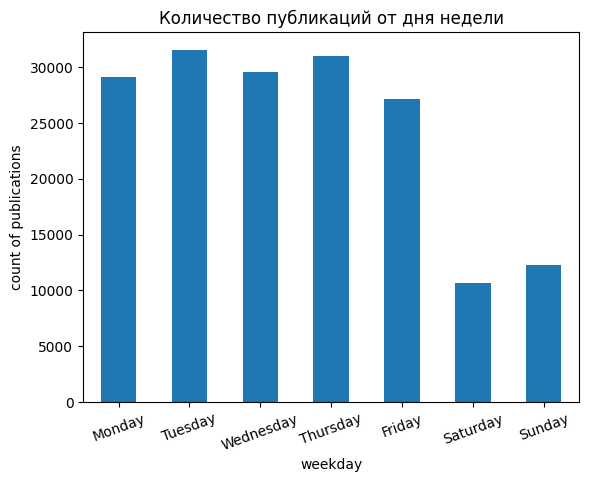

In [ ]:
data['weekday'].value_counts().sort_index().plot(kind='bar', title='Количество публикаций от дня недели', xlabel='weekday',ylabel='count of publications')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=20)
plt.show()

In [ ]:
# добавлю год как новую колонку, выведу количество публикаций по годам
data['year'] = pd.to_datetime(data['time_published']).dt.year
data['year'].value_counts()

2022    28919
2023    27374
2021    26662
2020    21979
2017    15879
2018    15506
2019    15152
2016    10318
2015     8080
2014     1430
2011        3
2013        2
2010        1
Name: year, dtype: int64

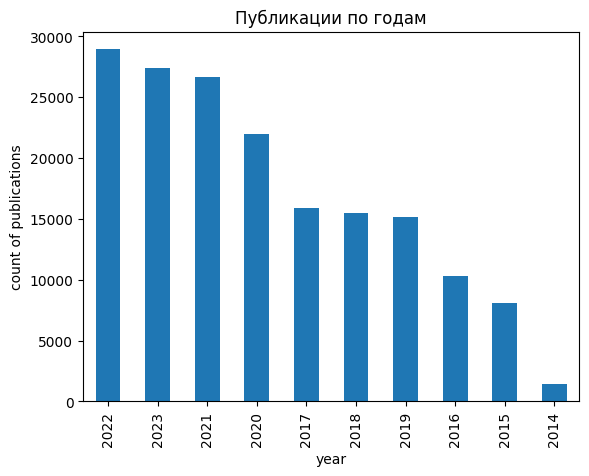

In [ ]:
data['year'][data['year']>2013].value_counts().plot(kind='bar', title='Публикации по годам',xlabel='year',ylabel='count of publications')
plt.show()

In [ ]:
# добавлю месяц как новую колонку, выведу их количество
data['month'] = pd.to_datetime(data['time_published']).dt.month
data['month'].value_counts().sort_index()

1     12894
2     13508
3     15132
4     14989
5     14503
6     14311
7     14324
8     14185
9     14672
10    14992
11    13583
12    14212
Name: month, dtype: int64

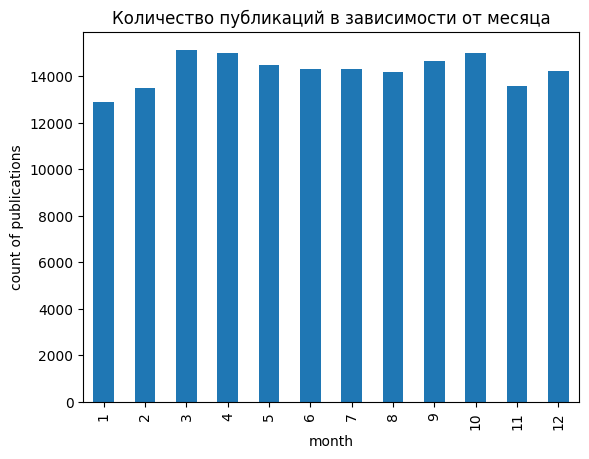

In [ ]:
data['month'].value_counts().sort_index().plot(kind='bar', title='Количество публикаций в зависимости от месяца', xlabel='month', ylabel='count of publications')
plt.show()

In [ ]:
# добавлю день как новую колонку, выведу их количество
data['day'] = pd.to_datetime(data['time_published']).dt.day
data['day'].value_counts().sort_index()

1     5107
2     5113
3     5192
4     5011
5     5311
6     5443
7     5578
8     5164
9     5423
10    5514
11    5413
12    5526
13    5879
14    5721
15    5796
16    5842
17    5932
18    5692
19    5673
20    5933
21    5757
22    5753
23    5486
24    5843
25    5890
26    5828
27    6131
28    6009
29    5455
30    5372
31    3518
Name: day, dtype: int64

In [ ]:
# добавлю время публикации как новую колонку
time = pd.to_datetime(data['time_published']).dt.time
data['time'] = time

In [ ]:
# удалю исходный столбец data_published
data.drop(columns='time_published', inplace=True)

Зависимость параметров описательной статистики финального рейтинга публикации (votes) от дня недели, месяца и года рамещения публикации.

In [ ]:
data['votes'].groupby(data['weekday']).describe()

,count,mean,std,min,25%,50%,75%,max
weekday,,,,,,,,
0,29101.0,17.600117,25.928514,-85.0,5.0,11.0,21.0,506.0
1,31529.0,17.671794,25.823623,-112.0,5.0,11.0,21.0,579.0
2,29537.0,17.314588,26.386993,-103.0,5.0,11.0,21.0,1447.0
3,31027.0,17.239211,24.992758,-194.0,5.0,11.0,21.0,473.0
4,27121.0,16.993990,24.374793,-81.0,5.0,11.0,21.0,622.0
5,10684.0,19.821134,27.581094,-89.0,6.0,13.0,24.0,588.0
6,12306.0,20.777913,28.024048,-71.0,6.0,13.0,25.0,462.0


In [ ]:
data['votes'][data['year']>2013].groupby(data['year']).describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2014,1430.0,20.291608,19.029008,-48.0,9.0,16.0,26.0,257.0
2015,8080.0,16.014851,15.740013,-57.0,7.0,12.0,20.0,213.0
2016,10318.0,17.637527,17.543992,-89.0,8.0,13.0,22.0,364.0
2017,15879.0,20.380188,22.597816,-103.0,8.0,15.0,25.0,506.0
2018,15506.0,23.201083,24.832107,-77.0,10.0,17.0,28.0,443.0
2019,15152.0,25.238054,32.267761,-88.0,10.0,17.0,29.0,622.0
2020,21979.0,18.563174,27.699111,-85.0,6.0,11.0,22.0,466.0
2021,26662.0,17.289176,28.067777,-112.0,5.0,11.0,19.0,1447.0
2022,28919.0,13.933815,26.693224,-106.0,3.0,6.0,14.0,587.0


In [ ]:
data['votes'].groupby(data['month']).describe()

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
1,12894.0,20.130371,31.063134,-194.0,6.0,12.0,24.0,1447.0
2,13508.0,18.531833,26.639702,-71.0,5.0,12.0,22.0,471.0
3,15132.0,17.693167,25.019086,-89.0,6.0,11.0,21.0,472.0
4,14989.0,17.892788,25.501358,-48.0,5.0,11.0,21.0,622.0
5,14503.0,17.695304,25.080519,-106.0,5.0,11.0,21.0,587.0
6,14311.0,16.958004,24.803372,-112.0,5.0,11.0,20.0,480.0
7,14324.0,17.015498,25.367550,-77.0,4.0,11.0,20.0,424.0
8,14185.0,17.439690,25.699180,-103.0,5.0,11.0,21.0,579.0
9,14672.0,17.939545,26.191663,-68.0,5.0,11.0,21.0,473.0


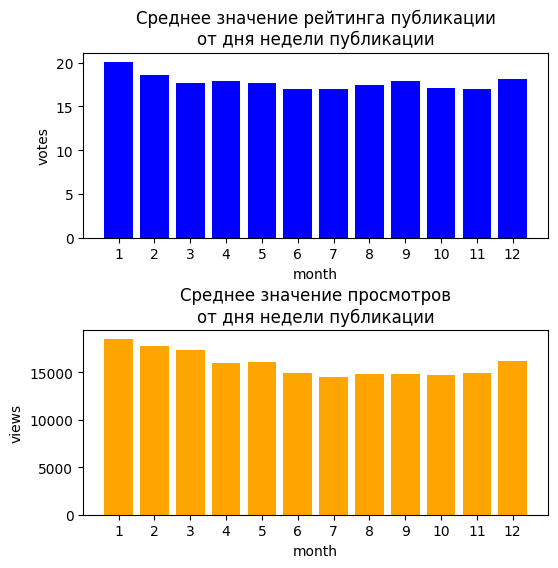

In [ ]:
plt.figure(figsize=(6, 6))
plt.subplot(2, 1, 1)
plt.bar(data['votes'].groupby(data['month']).mean().index, data['votes'].groupby(data['month']).mean().values,color='blue')
plt.xlabel('month')
plt.ylabel('votes')
plt.xticks(range(1,13))
plt.title("Среднее значение рейтинга публикации\nот дня недели публикации")


plt.subplot(2, 1, 2)
plt.bar(data['views'].groupby(data['month']).mean().index, data['views'].groupby(data['month']).mean().values,color='orange')
plt.title("Среднее значение просмотров\nот дня недели публикации")
plt.xlabel('month')
plt.ylabel('views')
plt.xticks(range(1,13))
plt.subplots_adjust(hspace=0.5)

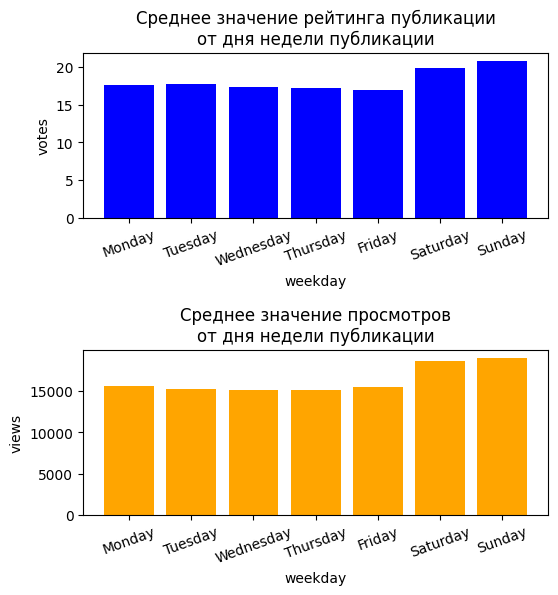

In [ ]:
plt.figure(figsize=(6, 6))
plt.subplot(2, 1, 1)
plt.bar(data['votes'].groupby(data['weekday']).mean().index, data['votes'].groupby(data['weekday']).mean().values,color='blue')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=20)
plt.xlabel('weekday')
plt.ylabel('votes')
plt.title("Среднее значение рейтинга публикации\nот дня недели публикации")


plt.subplot(2, 1, 2)
plt.bar(data['views'].groupby(data['weekday']).mean().index, data['views'].groupby(data['weekday']).mean().values,color='orange')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=20)
plt.xlabel('weekday')
plt.ylabel('views')
plt.title("Среднее значение просмотров\nот дня недели публикации")
plt.subplots_adjust(hspace=0.8)